In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

In [2]:
key = '2d546a7eaeb14fe2a0e5f781632d618d'

In [3]:
categories = 'artichoke','echidna'
path = Path('prickly_things')

In [4]:
if not path.exists():
    path.mkdir()
    for o in categories:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [5]:
fns = get_image_files(path)
fns

(#293) [Path('prickly_things/artichoke/00000000.jpg'),Path('prickly_things/artichoke/00000001.jpg'),Path('prickly_things/artichoke/00000002.jpg'),Path('prickly_things/artichoke/00000003.jpg'),Path('prickly_things/artichoke/00000004.jpg'),Path('prickly_things/artichoke/00000005.jpg'),Path('prickly_things/artichoke/00000006.jpg'),Path('prickly_things/artichoke/00000007.jpg'),Path('prickly_things/artichoke/00000008.jpg'),Path('prickly_things/artichoke/00000009.jpg')...]

In [ ]:
Image.open(fns[0])

In [ ]:
failed = verify_images(fns)
failed

In [ ]:
failed.map(Path.unlink);

In [6]:
prickly_things = DataBlock(blocks =(ImageBlock, CategoryBlock),
                          get_items = get_image_files,
                          splitter = RandomSplitter(valid_pct=0.2, seed=42),
                          get_y = parent_label,
                          item_tfms = Resize(128))

In [7]:
dls = prickly_things.dataloaders(path)

In [8]:
prickly_things = prickly_things.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = prickly_things.dataloaders(path)

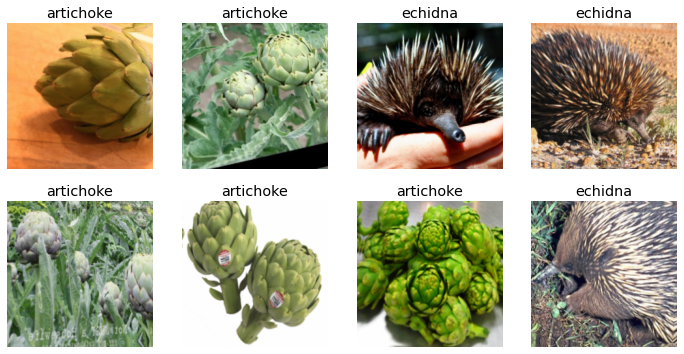

In [9]:
dls.train.show_batch(max_n=8, nrows=2)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.886122,0.048417,0.017241,00:07


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


epoch,train_loss,valid_loss,error_rate,time
0,0.101574,0.006546,0.000000,00:08
1,0.070802,0.000625,0.000000,00:09
2,0.048447,0.000191,0.000000,00:08
3,0.037404,0.000176,0.000000,00:08


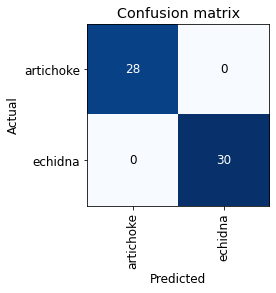

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
out_pl.clear_output()

In [39]:
VBox([widgets.Label('Select your prickly thing!'), 
      btn_upload, btn_run, out_pl, lbl_pred])